<a href="https://colab.research.google.com/github/GastonSalgueroE/Curso-IA/blob/main/Presentaci%C3%B3n%20Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cutting Stock Problem - Abordaje desde la inteligencia artificial aplicada

Iniciando el abordaje de la temática del **Cutting Stock Problem** desde la investigación operativa tanto con *algoritmos heurísticos*, como en *modelos matemáticos* que trabajan este problema de manera lineal, se observó en lectura de múltiples fuentes, que la temática suele ser indagada desde el desarrollo con ***algoritmos genéticos***. Dado que en el marco del curso “Enfoque Integral De La Inteligencia Artificial Aplicada”, brindado en la FCEFyN – UNC, se han proporcionado herramientas que se consideran con la **capacidad de trascender el poder de resolución** de las mencionadas inicialmente, es que se propone el desarrollo de una red neuronal que permita trabajar la temática desde la inteligencia artificial.


Dentro de industrias encontramos un tema que afecta a todas por igual, es la reducción de los costos de producción. Una de las maneras en que se tiene de abordarlo en la industria papelera, metal mecánica, del vidrio, la textil, entre otras, es dándole un máximo aprovechamiento a los recursos y de esta manera **disminuyendo al mínimo los desperdicios** de la producción. Para lograrlo es que desde la investigación de operaciones se trabaja a partir de la heurística, los modelos matemáticos, algoritmos genéticos, entre otros; trabajando el problema de corte de material(CSP por sus siglas en inglés, Cutting Stock Problem). Todo ello en la búsqueda de hallar posibles soluciones al problema mencionado.





---



#### Modelo matematico, como punto de partida:
El problema base surge de que la suma de ítems a cortar no debe exceder el tamaño del objeto del cual será extraído.
El modelo del cual se parte en Robert W. Haessler, Paul E.
Sweeney plantea como función objetivo:

**Min Σj Tj Xj** (1)

Siendo Tj igual al ancho útil de la materia prima (UW)
menos la sumatoria en i de la cantidad de ítems del ancho
Wi utilizados en el patrón j(A i,j) en producto por Wi (ancho de cada uno de los pedidos). Y como restricciones en este caso se plantean:

s.t.

RL i ≥ Σj Ai,j Xj ≤ RUi for all i (2)

Xj ≤ 0 and integer (3)

Siendo RL y RU los límites mínimos y máximos respectivamente.

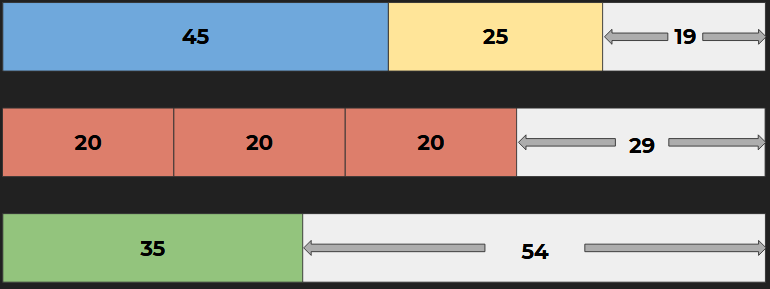






#### Se desglosa el problema en dos partes:

En la presente investigación solo se considerarán las variables **UW, Wi, A i,j y Tj**. Abordando de manera semejante al modelo desarrollado en P. C. Gilmore, R. E. Gomory el concepto de patrón de corte. Siendo el patrón factible si se cumple con la condición de que UW sea mayor o igual a la sumatoria en i de Wi en producto con A i,j. Siendo esta última condición un caso tratable de manera similar al problema de la mochila.

#### Heurísticas
En el desarrollo de Carlos P Gracia Calandín se aborda de una manera similar el problema. **En primera instancia se plantea un algoritmo genético que proporcione patrones óptimos** y luego se aborda en una segunda instancia otro algoritmo genético que determina la frecuencia de uso de dichos patrones.

Se han analizado algunos casos desde el potencial de las redes neuronales en el campo del corte de material y generación de patrones, C.H. Dagli y en la aplicación basada en el aprendizaje por refuerzo profundo se han obtenido resultados satisfactorios aplicables a la práctica, Fang, J.; Rao, Y.; Luo,
Q.; Xu, J.

En estudios recientes se han realizado avances pero en aplicaciones ya más específicas como en Sebastian Kraul, Markus Seizinger, Jens O. Brunner prediciendo valores duales óptimos dentro del modelo. En este último también se habla del inconveniente que genera el ingreso de información escasa y las formas de compensarlo.



---



## Implementación de Red Neuronal:
Con el fin de realizar una exploración la opción elegida fue el desarrollo y puesta en práctica de la aplicación de redes neuronales artificiales(RNA) con foco en **perceptrón multicapa**(MLP). Dicho modelo se compone de varias capas conectadas donde cada nodo en una capa está conectado a cada nodo en la siguiente capa.


### Beneficios de implementar MLP:

*   Altamente flexibles y **adaptables**.

(Puedes diseñar la arquitectura de capas ocultas según tus necesidades específicas)

*   Los MLP pueden aprender representaciones **no lineales** de los datos.

(Esto es útil cuando las relaciones entre las características, longitud, ancho, etc; no son lineales)

*   Capacidad para modelar Problemas Complejos; permite modelar **relaciones complejas**.

(La generación de patrones de corte puede ser un problema complejo con múltiples restricciones y objetivos.

Los MLP pueden manejar problemas multidimensionales y aprender a optimizar soluciones en función de múltiples variables.)

### Desventajas:

*   Se entrenan mediante aprendizaje supervisado.

(Lo que significa que necesitas **un conjunto de datos etiquetado con ejemplos de soluciones óptimas**)
*   **Hiperparámetros Sensibles**.

(La elección de la arquitectura y los hiperparámetros afecta el rendimiento)





### Base de Datos:
En primera instancia se trabajó con un algoritmo de primer ajuste decreciente (First Fit Decreasing, FFD). Dado que no siempre proporcionaba la solución óptima se optó por utilizar un algoritmo de mejor ajuste (Best Fit, BF).

In [ ]:
import random
import pandas as pd

In [ ]:
random.seed(6)

def agrupar_medidas(medidas, max_medida_por_grupo):
    medidas_ordenadas = sorted(medidas, reverse=True)
    grupos = []
    actual_grupo = []

    for medida in medidas_ordenadas:
        if sum(actual_grupo) + medida <= max_medida_por_grupo:
            actual_grupo.append(medida)
        else:
            grupos.append(actual_grupo)
            actual_grupo = [medida]

    grupos.append(actual_grupo)
    return grupos

# Inicializo la base de datos
data = {'Valores Iniciales': [], 'Patrones Formados': [], 'Desperdicio por Patrón': [], 'Desperdicio Total': []}

for _ in range(1000):
    # Genero 5 medidas aleatorias entre 0 y 600
    medidas = [random.randint(0, 600) for _ in range(5)]

    # Acomodo las medidas en patrones
    patrones = agrupar_medidas(medidas, 600)
    desperdicio_por_patron = [600 - sum(p) for p in patrones]
    desperdicio_total = sum(desperdicio_por_patron)

    # Agrego los resultados a la base de datos
    data['Valores Iniciales'].append(medidas)
    data['Patrones Formados'].append(patrones)
    data['Desperdicio por Patrón'].append(desperdicio_por_patron)
    data['Desperdicio Total'].append(desperdicio_total)

# Creo un DataFrame de pandas con los datos
df = pd.DataFrame(data)
print(df)

             Valores Iniciales                  Patrones Formados  \
0      [587, 82, 496, 267, 37]      [[587], [496], [267, 82, 37]]   
1      [0, 149, 600, 481, 382]      [[600], [481], [382, 149, 0]]   
2     [327, 22, 279, 500, 202]     [[500], [327], [279, 202, 22]]   
3     [423, 551, 552, 96, 197]   [[552], [551], [423], [197, 96]]   
4     [576, 566, 271, 90, 434]   [[576], [566], [434], [271, 90]]   
..                         ...                                ...   
995   [103, 270, 99, 574, 429]     [[574], [429], [270, 103, 99]]   
996  [336, 516, 508, 198, 125]  [[516], [508], [336, 198], [125]]   
997  [564, 211, 196, 174, 555]    [[564], [555], [211, 196, 174]]   
998   [160, 50, 131, 352, 190]       [[352, 190], [160, 131, 50]]   
999    [478, 455, 394, 8, 497]    [[497], [478], [455], [394, 8]]   

    Desperdicio por Patrón  Desperdicio Total  
0           [13, 104, 214]                331  
1             [0, 119, 69]                188  
2           [100, 273, 97] 

Un desafío encontrado al momento de generar la base de datos, dado que no se contaba con bases previas, fue el modo en el que se distribuía la información. Se resolvió a posterior gestionando columnas únicas para cada valor evitando el inconveniente que generaba contar con listas que diferían de dimensión. Pero también, generó sesgos en los casos en los que correspondía valor cero.

In [ ]:
# Semilla para random
random.seed(6)

def agrupar_medidas(medidas, max_medida_por_grupo):
    medidas_ordenadas = sorted(medidas, reverse=True)
    grupos = []
    espacios_libres = []

    for medida in medidas_ordenadas:
        mejor_indice = -1
        for i, espacio_libre in enumerate(espacios_libres):
            if espacio_libre >= medida and (mejor_indice == -1 or espacio_libre < espacios_libres[mejor_indice]):
                mejor_indice = i

        if mejor_indice != -1:
            grupos[mejor_indice].append(medida)
            espacios_libres[mejor_indice] -= medida
        else:
            grupos.append([medida])
            espacios_libres.append(max_medida_por_grupo - medida)

    return grupos

# Inicializo la base de datos
data = {'Valor Inicial 1': [], 'Valor Inicial 2': [], 'Valor Inicial 3': [], 'Valor Inicial 4': [], 'Valor Inicial 5': [], 'Patrón 1': [], 'Patrón 2': [], 'Patrón 3': [], 'Patrón 4': [], 'Patrón 5': [], 'Desperdicio Patrón 1': [], 'Desperdicio Patrón 2': [], 'Desperdicio Patrón 3': [], 'Desperdicio Patrón 4': [], 'Desperdicio Patrón 5': [], 'Desperdicio Total': []}

for _ in range(10000):
    # Genero 5 medidas aleatorias entre 0 y 600
    medidas = sorted([random.randint(0, 600) for _ in range(5)], reverse=True)

    # Acomodo las medidas en patrones
    patrones = agrupar_medidas(medidas, 600)
    desperdicio_por_patron = [600 - sum(p) for p in patrones]
    desperdicio_total = sum(desperdicio_por_patron)

    # Normalizo las listas a la longitud máxima
    max_len = max(len(p) for p in patrones)
    patrones = [p + [0]*(max_len-len(p)) for p in patrones]
    desperdicio_por_patron = desperdicio_por_patron + [0]*(max_len-len(desperdicio_por_patron))

    # Agrego los resultados a la base de datos
    for i in range(5):
        data[f'Valor Inicial {i+1}'].append(medidas[i] if i < len(medidas) else 0)
        data[f'Patrón {i+1}'].append(sum(patrones[i]) if i < len(patrones) else 0)
        data[f'Desperdicio Patrón {i+1}'].append(desperdicio_por_patron[i] if i < len(desperdicio_por_patron) else 0)
    data['Desperdicio Total'].append(desperdicio_total)

# Creo un DataFrame de pandas con los datos
df = pd.DataFrame(data)
print(df)

      Valor Inicial 1  Valor Inicial 2  Valor Inicial 3  Valor Inicial 4  \
0                 587              496              267               82   
1                 600              481              382              149   
2                 500              327              279              202   
3                 552              551              423              197   
4                 576              566              434              271   
...               ...              ...              ...              ...   
9995              430              349              196              160   
9996              524              429              196              161   
9997              459              433              295              188   
9998              372              199              176               95   
9999              341              227              212              209   

      Valor Inicial 5  Patrón 1  Patrón 2  Patrón 3  Patrón 4  Patrón 5  \
0           

Es importante destacar que realizar este cambio fue desfavorable para el desempeño del MLP. Se analizó que la causa es que al contar con mayor número de valores cero en la base de datos se puede sesgar los resultados de la RNA. Se pensaron posibilidades de, por ejemplo, tratar los ceros como valores faltantes y utilizar técnicas de imputación para llenarlos;o añadir una pequeña constante a todos los valores para evitar los ceros, pero los resultados no representaron una mejora.

### Arquitectura de la red:
La red se definió utilizando el MLPRegressor de Sklearn.neural_network; inicialmente se trabajó realizando predicciones de desperdicio total de los patrones generados.

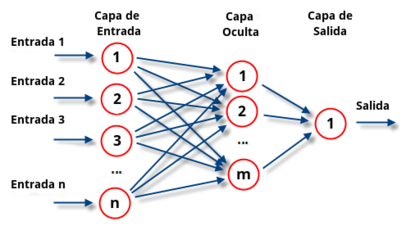

En esta instancia se realizó normalización de datos ya que es un paso importante en el preprocesamiento de los datos; luego se divide el conjunto de datos en un conjunto de entrenamiento y un conjunto de prueba. El 80 porciento de los datos se utilizan para el entrenamiento y el 20 porciento para la prueba.

Se crea un modelo de regresión MLP con 3 capas ocultas, cada una con 30 neuronas. La función de activación es ReLU (Rectified Linear Unit) y el número máximo de iteraciones para el solucionador es 1000. Luego, el modelo se entrena utilizando el conjunto de entrenamiento.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

Error cuadrático medio: 0.6073120015692433


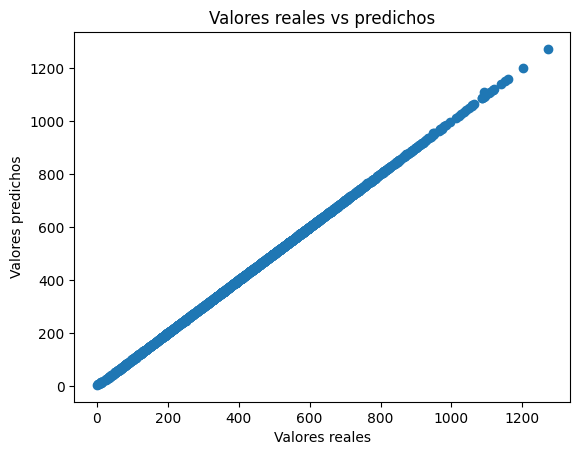

In [ ]:
# Creo y entreno el MLP
mlp = MLPRegressor(hidden_layer_sizes=(30,30,30), max_iter=1000)
mlp.fit(X_train, y_train)

# Predigo los valores de prueba
y_pred = mlp.predict(X_test)

# Calculo el error cuadrático medio
mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio: {mse}")

# Grafico los valores reales vs los predichos
plt.scatter(y_test, y_pred)
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.title('Valores reales vs predichos')
plt.show()

In [ ]:
# Calculo el ECM para los valores de entrenamiento
y_train_pred = mlp.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
print(f"ECM en el conjunto de entrenamiento: {mse_train}")

# Calculo el ECM para los valores de prueba
mse_test = mean_squared_error(y_test, y_pred)
print(f"ECM en el conjunto de prueba: {mse_test}")

ECM en el conjunto de entrenamiento: 0.3428067997401305
ECM en el conjunto de prueba: 0.6073120015692433




---



Dado que se desea predecir los patrones se incursiona en configurar la red para que maneje múltiples variables de salida, por lo cual se procede del siguiente modo:

Se definen las variables de entrada y salida (X, y): Aquí se seleccionan las columnas del data frame que se utilizarán como variables de entrada (X) y de salida (y). Las variables de entrada son ‘Valor Inicial 1’, ‘Valor Inicial 2’, ‘Valor Inicial 3’, ‘Valor Inicial 4’, ‘Valor Inicial 5’(estos son los valores de los ítem que quieren ser ordenados en el patrón).

Las variables de salida son todas las demás columnas que son **patrón generado** (representa la sumatoria de los ítems en el patrón), **desperdicio por patrón y desperdicio total.**

### Ajuste del modelo:
Dado que la complejidad es mayor en este caso se aumenta el número máximo de iteraciones para el solucionador a 5000.
Y como los valores deben de ser enteros, las predicciones se redondean al entero más cercano. La arquitectura final queda
de la siguiente manera:

Capa de entrada: Cuenta con un número de nodos igual al número de características de entrada en la base de datos.
Capas ocultas: Hay cuatro capas ocultas, cada una con 30 nodos. Las capas ocultas utilizan la función de activación ReLU (Rectified Linear Unit). ReLU introduce no linealidad al permitir que las neuronas se activen solo si la entrada es positiva.

**El problema de corte de patrones implica relaciones no lineales entre las características de las piezas y las restricciones.
ReLU permite que la red modele estas relaciones no lineales, lo que es beneficioso para encontrar soluciones óptimas.**


Capa de salida: Cuenta con un número de nodos igual al número de variables de salida de datos.

In [ ]:
# Defino las variables de entrada y salida
X = df[['Valor Inicial 1', 'Valor Inicial 2', 'Valor Inicial 3', 'Valor Inicial 4', 'Valor Inicial 5']]
y = df.drop(['Valor Inicial 1', 'Valor Inicial 2', 'Valor Inicial 3', 'Valor Inicial 4', 'Valor Inicial 5'], axis=1)

# Normalizo los datos
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Divido los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creo y entreno el MLP
mlp = MLPRegressor(hidden_layer_sizes=(30,30,30,30), activation='relu', max_iter=5000)
#mlp = MLPRegressor(hidden_layer_sizes=(30,30,30,30), activation='logistic', max_iter=1000)
#mlp = MLPRegressor(hidden_layer_sizes=(60,60,60), max_iter=5000)
mlp.fit(X_train, y_train)

# Predigo los valores de prueba
y_pred = mlp.predict(X_test)

# Redondeo las predicciones a los enteros más cercanos
y_pred = np.round(y_pred)

Error cuadrático medio: [1339.535, 1895.009, 2371.998, 1032.075, 344.0035, 1241.341, 2012.738, 3839.972, 1766.8225, 821.982, 5535.7105]


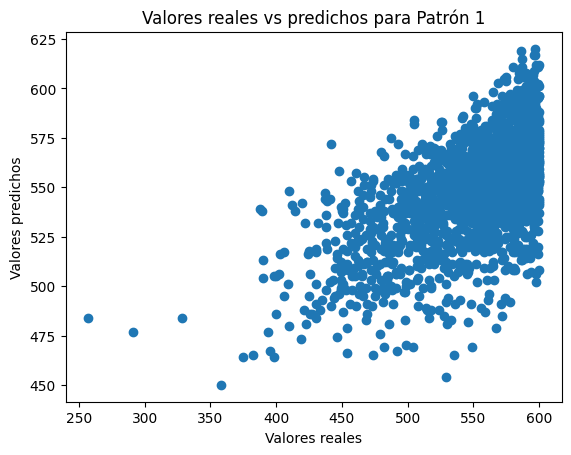

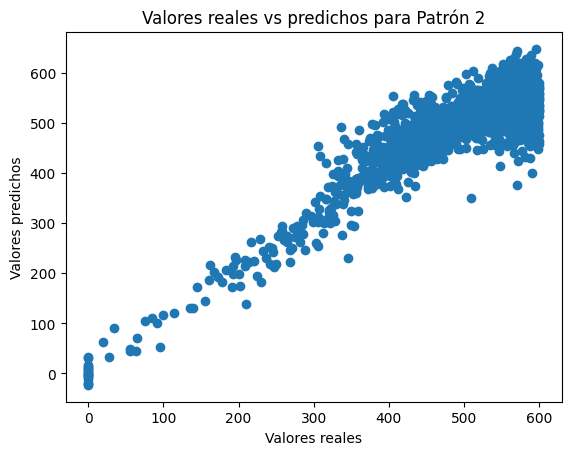

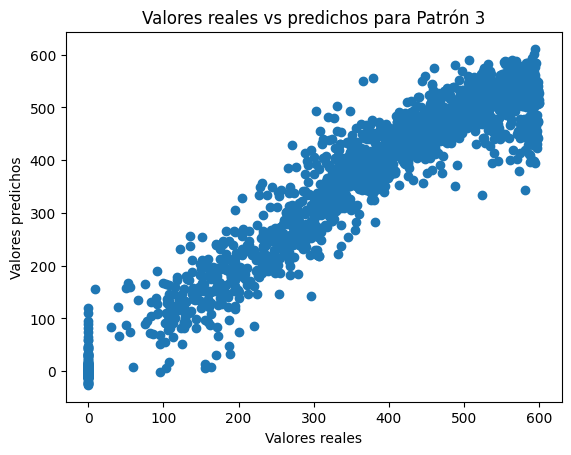

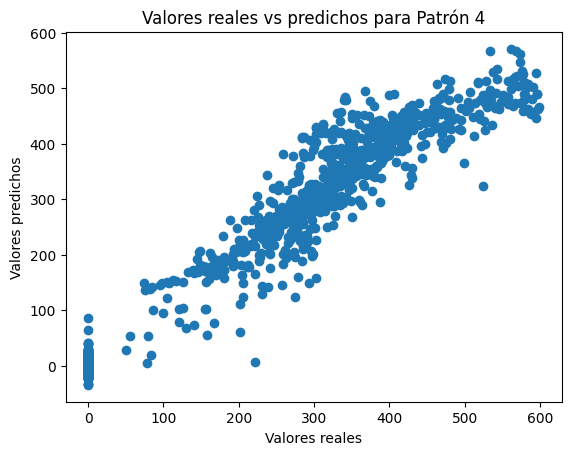

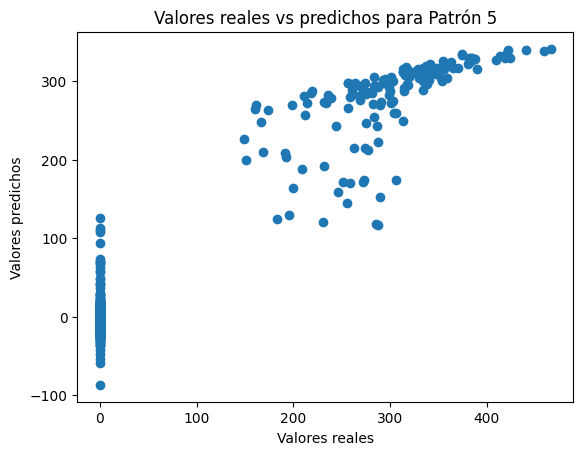

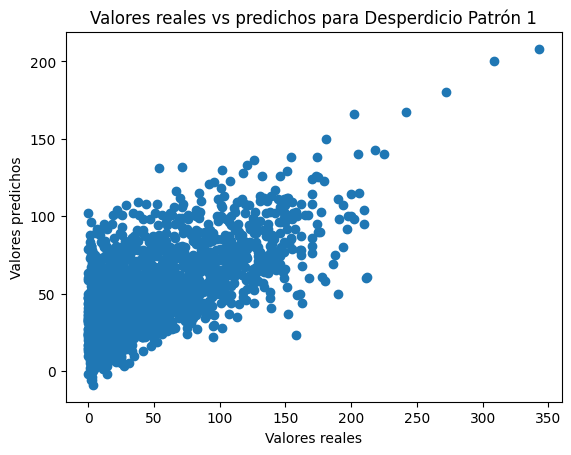

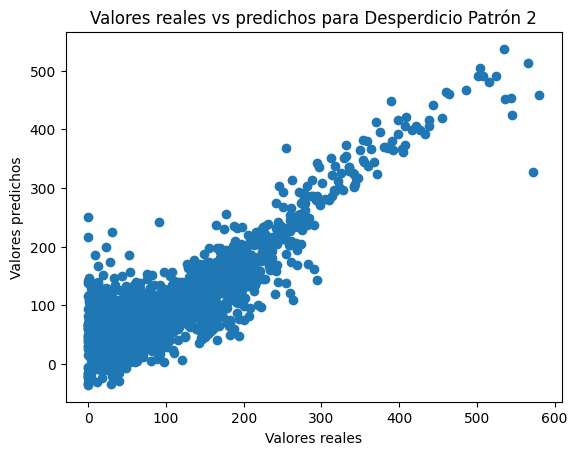

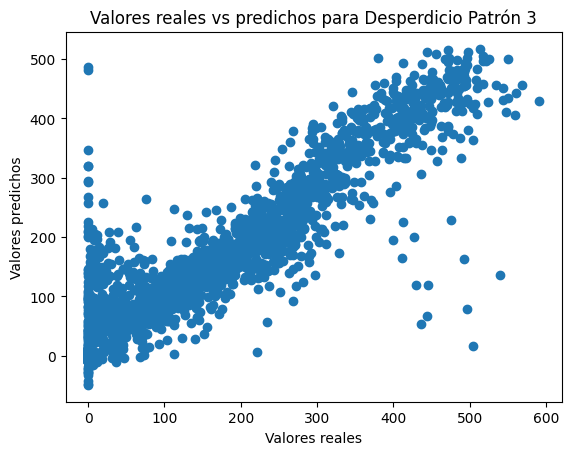

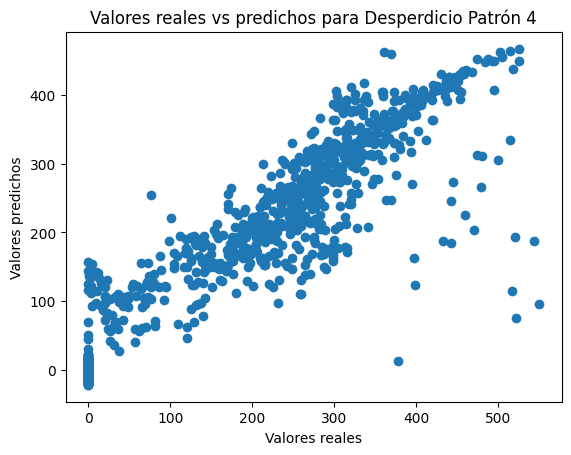

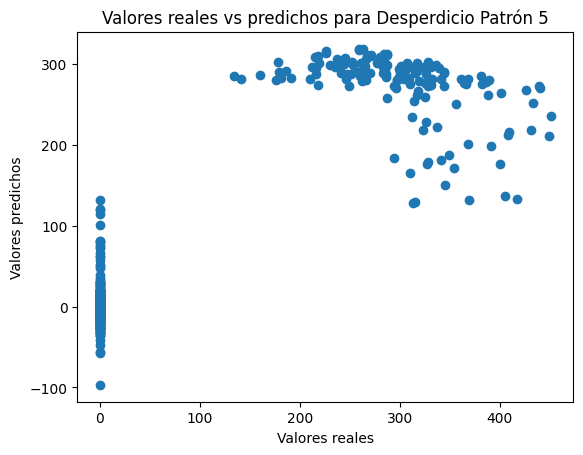

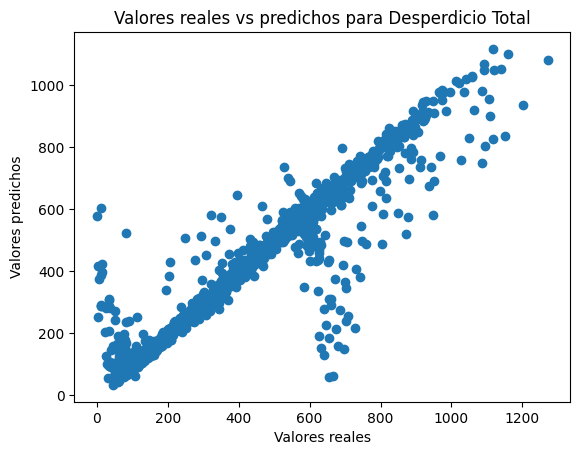

In [ ]:
# Calculo el error cuadrático medio para cada variable de salida
mse = [mean_squared_error(y_test.iloc[:, i], y_pred[:, i]) for i in range(y_test.shape[1])]
print(f"Error cuadrático medio: {mse}")

# Grafico los valores reales vs los predichos para cada variable de salida
for i in range(y_test.shape[1]):
    plt.figure(i)
    plt.scatter(y_test.iloc[:, i], y_pred[:, i])
    plt.xlabel('Valores reales')
    plt.ylabel('Valores predichos')
    plt.title(f'Valores reales vs predichos para {y.columns[i]}')
    plt.show()

In [ ]:
# Calculo el MSE total
mse_total = sum(mse)

# Calculo el porcentaje de cada MSE
mse_percentage = [(m / mse_total) * 100 for m in mse]

# Imprimo los porcentajes de MSE
for i, percentage in enumerate(mse_percentage):
    print(f"Porcentaje de MSE para {y.columns[i]}: {percentage}%")

Porcentaje de MSE para Patrón 1: 6.033618968968168%
Porcentaje de MSE para Patrón 2: 8.535620382271011%
Porcentaje de MSE para Patrón 3: 10.68410465359588%
Porcentaje de MSE para Patrón 4: 4.648738030285003%
Porcentaje de MSE para Patrón 5: 1.549482501757282%
Porcentaje de MSE para Desperdicio Patrón 1: 5.591327292349893%
Porcentaje de MSE para Desperdicio Patrón 2: 9.065902851633629%
Porcentaje de MSE para Desperdicio Patrón 3: 17.296246756901933%
Porcentaje de MSE para Desperdicio Patrón 4: 7.958234574535014%
Porcentaje de MSE para Desperdicio Patrón 5: 3.7024237420824333%
Porcentaje de MSE para Desperdicio Total: 24.934300245619756%


Realizo pruebas con cinco ítems nuevos a partir del modelo ya entrenado:

In [ ]:
# Defino los nuevos valores iniciales
nuevos_valores_iniciales = [[587, 400, 350, 320, 120]]

# Normalizo los nuevos valores iniciales
nuevos_valores_iniciales = scaler.transform(nuevos_valores_iniciales)

# Predigo los valores de salida para los nuevos valores iniciales
predicciones = mlp.predict(nuevos_valores_iniciales)

# Redondeo las predicciones a los enteros más cercanos
predicciones = np.round(predicciones)

# Imprimo las predicciones
for i in range(predicciones.shape[1]):
    print(f'Predicción para {y.columns[i]}: {predicciones[0, i]}')

Predicción para Patrón 1: 539.0
Predicción para Patrón 2: 492.0
Predicción para Patrón 3: 395.0
Predicción para Patrón 4: 316.0
Predicción para Patrón 5: -17.0
Predicción para Desperdicio Patrón 1: 51.0
Predicción para Desperdicio Patrón 2: 98.0
Predicción para Desperdicio Patrón 3: 202.0
Predicción para Desperdicio Patrón 4: 288.0
Predicción para Desperdicio Patrón 5: -11.0
Predicción para Desperdicio Total: 626.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Se observa que si el problema es fragmentado hay mayores posibilidades de abordaje desde esta tecnología; logrando asemejarse a otros casos tales como lo son el caso del problema del viajante o del problema de la mochila.